# The Benchmarking Interlude

To get the total time taken to run multiple calls to a function with arbitrary positional arguments, the following first- cut function might suffice:

In [ ]:
from timer0 import timer

In [ ]:
timer(pow, 2, 4) # Time to call pow(2, 4) 1000 times

In [ ]:
pow?

In [ ]:
timer(str.upper, 'spam') # Time to call 'spam'.upper() 1000 times

Though simple, this timer is also fairly limited, and deliberately exhibits some classic mistakes in both function design and benchmarking. Among these, it:

* Doesn’t support keyword arguments in the tested function call (everything is positional)
* Hardcodes the repetitions count
* Only gives total time, which might fluctuate on some heavily loaded machines

In [ ]:
import timer

In [ ]:
timer.total(1000, pow, 2, 1000)

In [ ]:
timer.total(1000, str.upper, 'spam')

In [ ]:
timer.bestof(1000, str.upper, 'spam')

In [ ]:
timer.bestof(1000, pow, 2, 1000000)[0]

In [ ]:
#nested loop (bestof has reps of 50, total has reps of 1000)
timer.bestof(50, timer.total, 1000, str.upper, 'spam')

In [ ]:
timer.bestoftotal(50, 1000, str.upper, 'spam') #same thing

### timeit module

In [1]:
import timeit

In [2]:
timeit.repeat?

In [3]:
#run statement 1000 times and repeat it 5 times
timeit.repeat(stmt="[x ** 2 for x in range(1000)]", number=100, repeat=5)

[0.024402999999892927,
 0.024804799999856186,
 0.025889400000323803,
 0.023303499999656196,
 0.02284079999981259]

In [17]:
min(timeit.repeat(stmt="[x ** 2 for x in range(1000)]", number=100, repeat=5))

0.02272979999997915

In [19]:
timeit.timeit(stmt='[x ** 2 for x in range(1000)]', number=1000) # Total time

0.2467117999999573

In [20]:
def testcase():
    y = [x ** 2 for x in range(1000)] # Callable objects or code strings

In [22]:
min(timeit.repeat(stmt=testcase, number=1000, repeat=3))

0.22842780000019047

# Modules: The Big Picture

In concrete terms, modules typically correspond to Python program files. Each file is a module, and modules import other modules to use the names they define.

**import**:
Lets a client (importer) fetch a module as a whole

**from**:
Allows clients to fetch particular names from a module

**imp.reload**:
Provides a way to reload a module’s code without stopping Python

### Why Use Modules?

In short, modules provide an easy way to organize components into a system by serving as self-contained packages of variables known as namespaces. 

More specifically, modules have at least three roles

* Code reuse

* System namespace partitioning

* Implementing shared services or data

### Python Program Architecture

In practice, programs usually involve more than just one file. Python fosters a modular program structure that groups functionality into coherent and reusable units.

Below figure sketches the structure of a Python program composed of three files: a.py, b.py, and c.py. The file a.py is chosen to be the top-level file; it will be a simple text file of statements, which is executed from top to bottom when launched. The files b.py and c.py are modules; they are simple text files of statements as well, but they are not usually launched directly. Instead, modules are normally imported by other files that wish to use the tools the modules define.

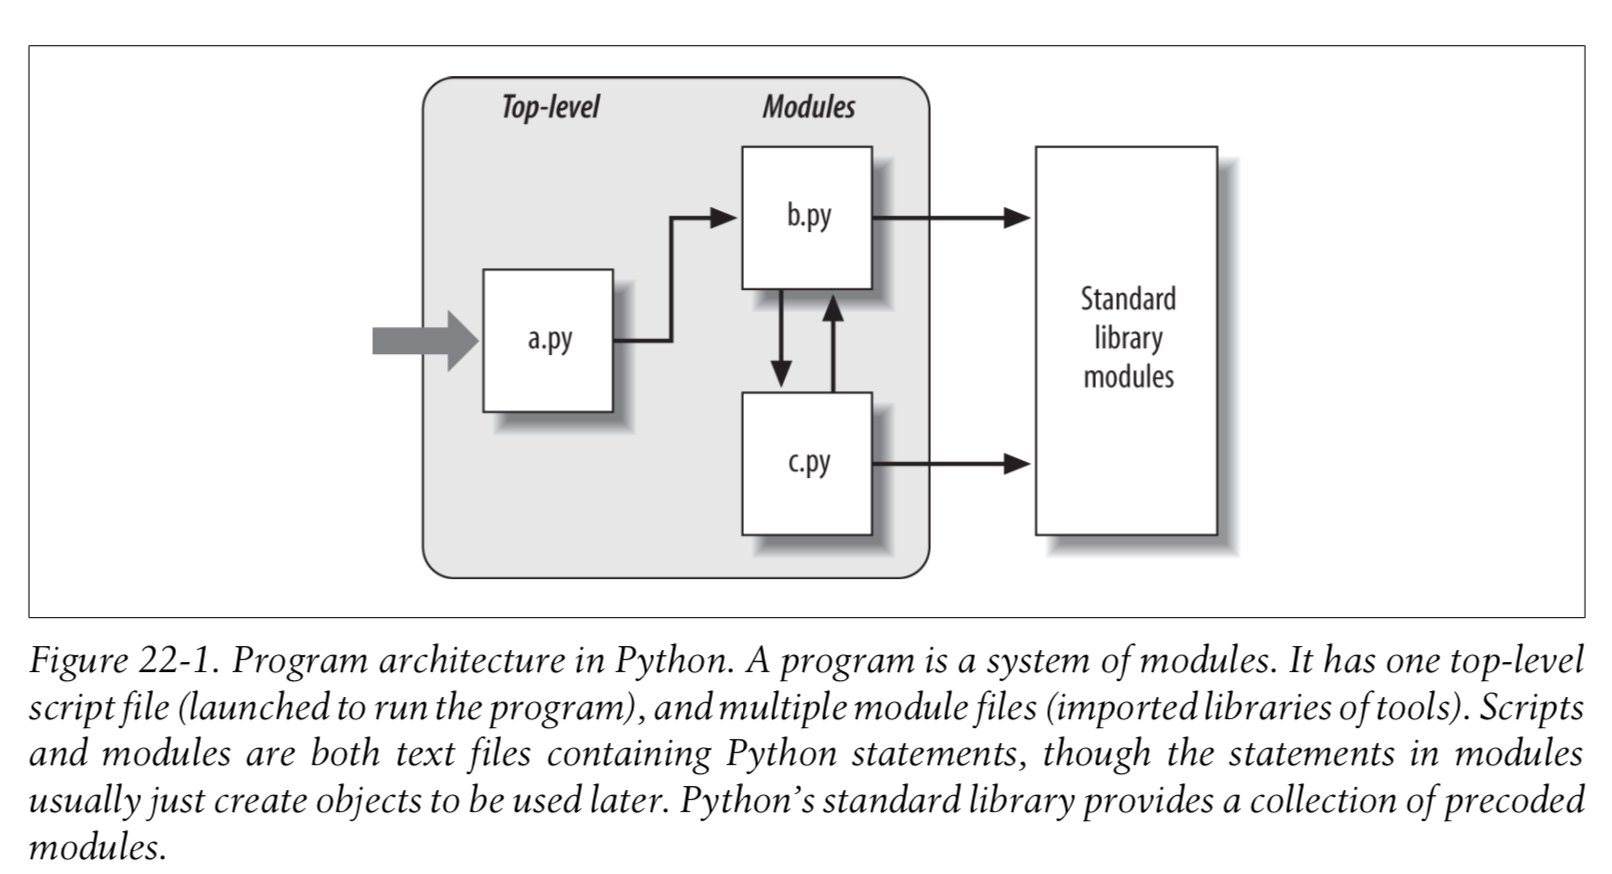

In [24]:
import b # File a.py
b.spam('gumby') # Prints "gumby spam"

gumby spam


In [25]:
import a

gumby spam


In Python, imports are really runtime operations that perform three distinct steps the first time a program imports a given file:

1. Find the module’s file.

2. Compile it to byte code (if needed).

3. Run the module’s code to build the objects it defines.

### The Module Search Path

If you want to be able to import userdefined files across directory boundaries, though, you will need to know how the search path works in order to customize it.

Roughly, Python’s module search path is composed of the concatenation of these major components, some of which are preset for you and some of which you can tailor to tell Python where to look:

1. The home directory of the program
2. PYTHONPATH directories (if set)
3. Standard library directories
4. The contents of any .pth files (if present)
5. The site-packages home of third-party extensions

The first and third elements of the search path are defined automatically. Because Python searches the concatenation of these components from first to last, though, the second and fourth elements can be used to extend the path to include your own source code directories. 

If you want to see how the module search path is truly configured on your machine, you can always inspect the path as Python knows it by printing the built-in ``sys.path``.

In [ ]:
import sys
print(sys.path)

Keep in mind that filename extensions (e.g., .py) are omitted from import statements intentionally. Python chooses the first file it can find on the search path that matches the imported name. In fact, imports are the point of interface to a host of external components—source code, multiple flavors of byte code, compiled extensions, and more. Python automatically selects any type that matches a module’s name.

# Module Coding Basics

**Module Creation:** To define a module, simply use your text editor to type some Python code into a text file, and save it with a “.py” extension; any such file is automatically considered a Python module. 

**Module File names:** should end in a .py suffix if you plan to import them. 

**The import statement:**

In [ ]:
import module1  # Get module as a whole (one or more)
module1.printer('Hello world!') # Qualify to get names

**The from statement:**

In [ ]:
from module1 import printer  # copy out a variable (one or more)
printer('Hello world!')

**The from * Statement:**

In [ ]:
#from imp import reload
#reload(module1)

In [ ]:
from module1 import *  # copy out all variables
printer('Hello world!')

In [ ]:
A

In [ ]:
B

In [ ]:
module1.A

**Imports Happen Only Once**

In [ ]:
import simple # First import: loads and runs file's code

In [ ]:
simple.spam # Assignment makes an attribute

Second and later imports don’t rerun the module’s code; they just fetch the already created module object from Python’s internal modules table. Thus, the variable spam is not reinitialized:

In [ ]:
simple.spam = 10  # change attribute in module

In [ ]:
import simple    # just fetches already loaded module

In [ ]:
simple.spam     

**Changing mutables in modules**

In [ ]:
from small import x, y
x

In [ ]:
from small import x, y  # Copy two names out
x = 42                  # changes local x only (numbers are not changeable -immutable)
y[0] = 42               # changes shared mutable in place
print(x)

Here, x is not a shared mutable object, but y is. The names y in the importer and the importee both reference the same list object, so changing it from one place changes it in the other:

In [ ]:
import small    # Get module name
small.x         # Small's x is not my x

In [ ]:
small.y        # But we share a changed mutable

**import and from Equivalence**

is equivalent to this staement sequence:

**When import is required**

the from statement will fail - you can only have one assignment to the name in your scope:

In [ ]:
# O.py
from M import func
from N import func   # This overwrites the one we fetched from M
func()               # Calls N.func only!

An import will work here, though, because including the name of the enclosing module makes the two names unique:

In [ ]:
# O.py
import M     # Get the whole modules, not their names
import N
M.func()     # We can call both names now
N.func()     # The module names make them unique

Another way out of this dilemma is using the as extension:

In [ ]:
from M import func as mfunc   # Rename uniquely with 'as'
from N import func as nfunc
mfunc(); nfunc()             # Calls one or the other

**Module Namespaces**

In [ ]:
import module2

The first time this module is imported (or run as a program), Python executes its statements from top to bottom.

In [ ]:
import module2

Once the module is loaded, its scope becomes an attribute namespace in the module object we get back from ``import``. 

In [ ]:
module2.name

In [ ]:
#name of the module
module2.__name__

In [ ]:
module2.func

In [ ]:
module2.klass

We can access a module’s namespace dictionary through the module’s __dict__ attribute.

In [ ]:
list(module2.__dict__.keys())

Python also adds some names in the module’s namespace for us; for instance, __file__ gives the name of the file the module was loaded from, and __name__ gives its name as known to importers (without the .py extension and directory path).

**Namespace Nesting**

In [ ]:
# import mod1,2,3
X = 1
import mod1,mod2,mod3

In [ ]:
import mod1

In [ ]:
run mod1.py

In [ ]:
import mod1 # may not need this

In [ ]:
#reload import reload 
X = 1
from imp import reload
reload(mod3)

#may not need this


**Reloading Modules**

As we’ve seen, a module’s code is run only once per process by default. To force a module’s code to be reloaded and rerun, you need to ask Python to do so explicitly by calling the reload built-in function.

In [ ]:
import changer

In [ ]:
changer.printer()

In [ ]:
import changer

In [ ]:
changer.printer() # No effect: uses loaded module

In [ ]:
from imp import reload

In [ ]:
reload(changer) # Forces new code to load/run

In [ ]:
changer.printer() # Runs the new version now

In [ ]:
changer.printer()

In [ ]:
import changer

In [ ]:
changer.printer()

In [ ]:
reload(changer)

In [ ]:
changer.printer()

# Module Packages

In addition to a module name, an import can name a directory path. A directory of Python code is said to be a package, so such imports are known as *package imports*.

At a base level, package imports are straightforward:

These two import statements imply a directory structure that looks something like this:

dir0/dir1/dir2/mod.py

The container directory dir0 needs to be added to your module search path unless it’s
the home directory of the top-level file.

**Package ``__init__.py`` files**

For a directory structure such as this:

and an import statement of the form:

the following rules apply:

* dir1 and dir2 both must contain an ``__init__.py`` file.

* dir0, the container, does not require an ``__init__.py`` file; this file will simply be ignored if present.

* dir0, not dir0\dir1, must be listed on the module search path sys.path.

The net effect is that this example’s directory structure should be as follows:

The ``__init__.py`` files can contain Python code, just like normal module files. Their names are special because their code is run automatically the first time a Python program imports a directory, and thus serves primarily as a hook for performing initialization steps required by the package. 

**Package Import Example**:

``import`` statements run each directory’s initialization file the first time that directory is traversed, as Python descends the path; ``print`` statements are included here to trace their execution:

In [ ]:
import dir1.dir2.mod # First imports run init files
#from imp import reload
#reload(dir1.dir2.mod)

In [ ]:
from imp import reload
reload(dir1.dir2.mod)

In [ ]:
import dir1.dir2.mod # Later imports do not

Just like module files, an already imported directory may be passed to reload to force reexecution of that single item. 

In [ ]:
from imp import reload
reload(dir1.dir2.mod)

In [ ]:
from imp import reload

In [ ]:
reload(dir1.dir2.mod)

In [ ]:
import dir1.dir2.mod

In [ ]:
reload(dir1)

Once imported, the path in your import statement becomes a nested object path in your script.

In [ ]:
dir1

In [ ]:
dir1.dir2

In [ ]:
dir1.dir2.mod

In [ ]:
dir1.x

In [ ]:
dir1.dir2.y

In [ ]:
dir1.dir2.mod.z

**from Versus import with Packages**

``import`` statements can be somewhat inconvenient to use with packages, because you may have to retype the paths frequently in your program.

In [ ]:
from dir1.dir2 import mod # Code path here only

In [ ]:
mod.z # Don't repeat path

In [ ]:
from dir1.dir2.mod import z

In [ ]:
z

In [ ]:
import dir1.dir2.mod as mm # Use shorter name

In [ ]:
mm.z

In [ ]:
from dir1.dir2.mod import z as modz

In [ ]:
modz

The only time package imports are actually required is to resolve ambiguities that may arise when multiple programs with same-named files are installed on a single machine.

Suppose we have:

So far, there’s no problem: both systems can coexist and run on the same computer.

However, suppose that after you’ve installed these two programs on your machine, you decide that you’d like to use some of the code in each of the utilities.py files in a system of your own.

To make this work at all, you’ll have to set the module search path to include the directories containing the utilities.py files. But which directory do you put first in the path—system1 or system2?

This is the issue that packages actually fix. 

Now, add just the common root directory to your search path.

**Package Relative Imports**

Rather than listing package import paths, imports within the package can be relative to the package.

**Why relative imports?**

Consider the following package directory:

An additional leading dot performs the relative import starting from the parent of the current package.

# Advanced Module Topics

As a summary, below figure sketches the environment in which modules operate:

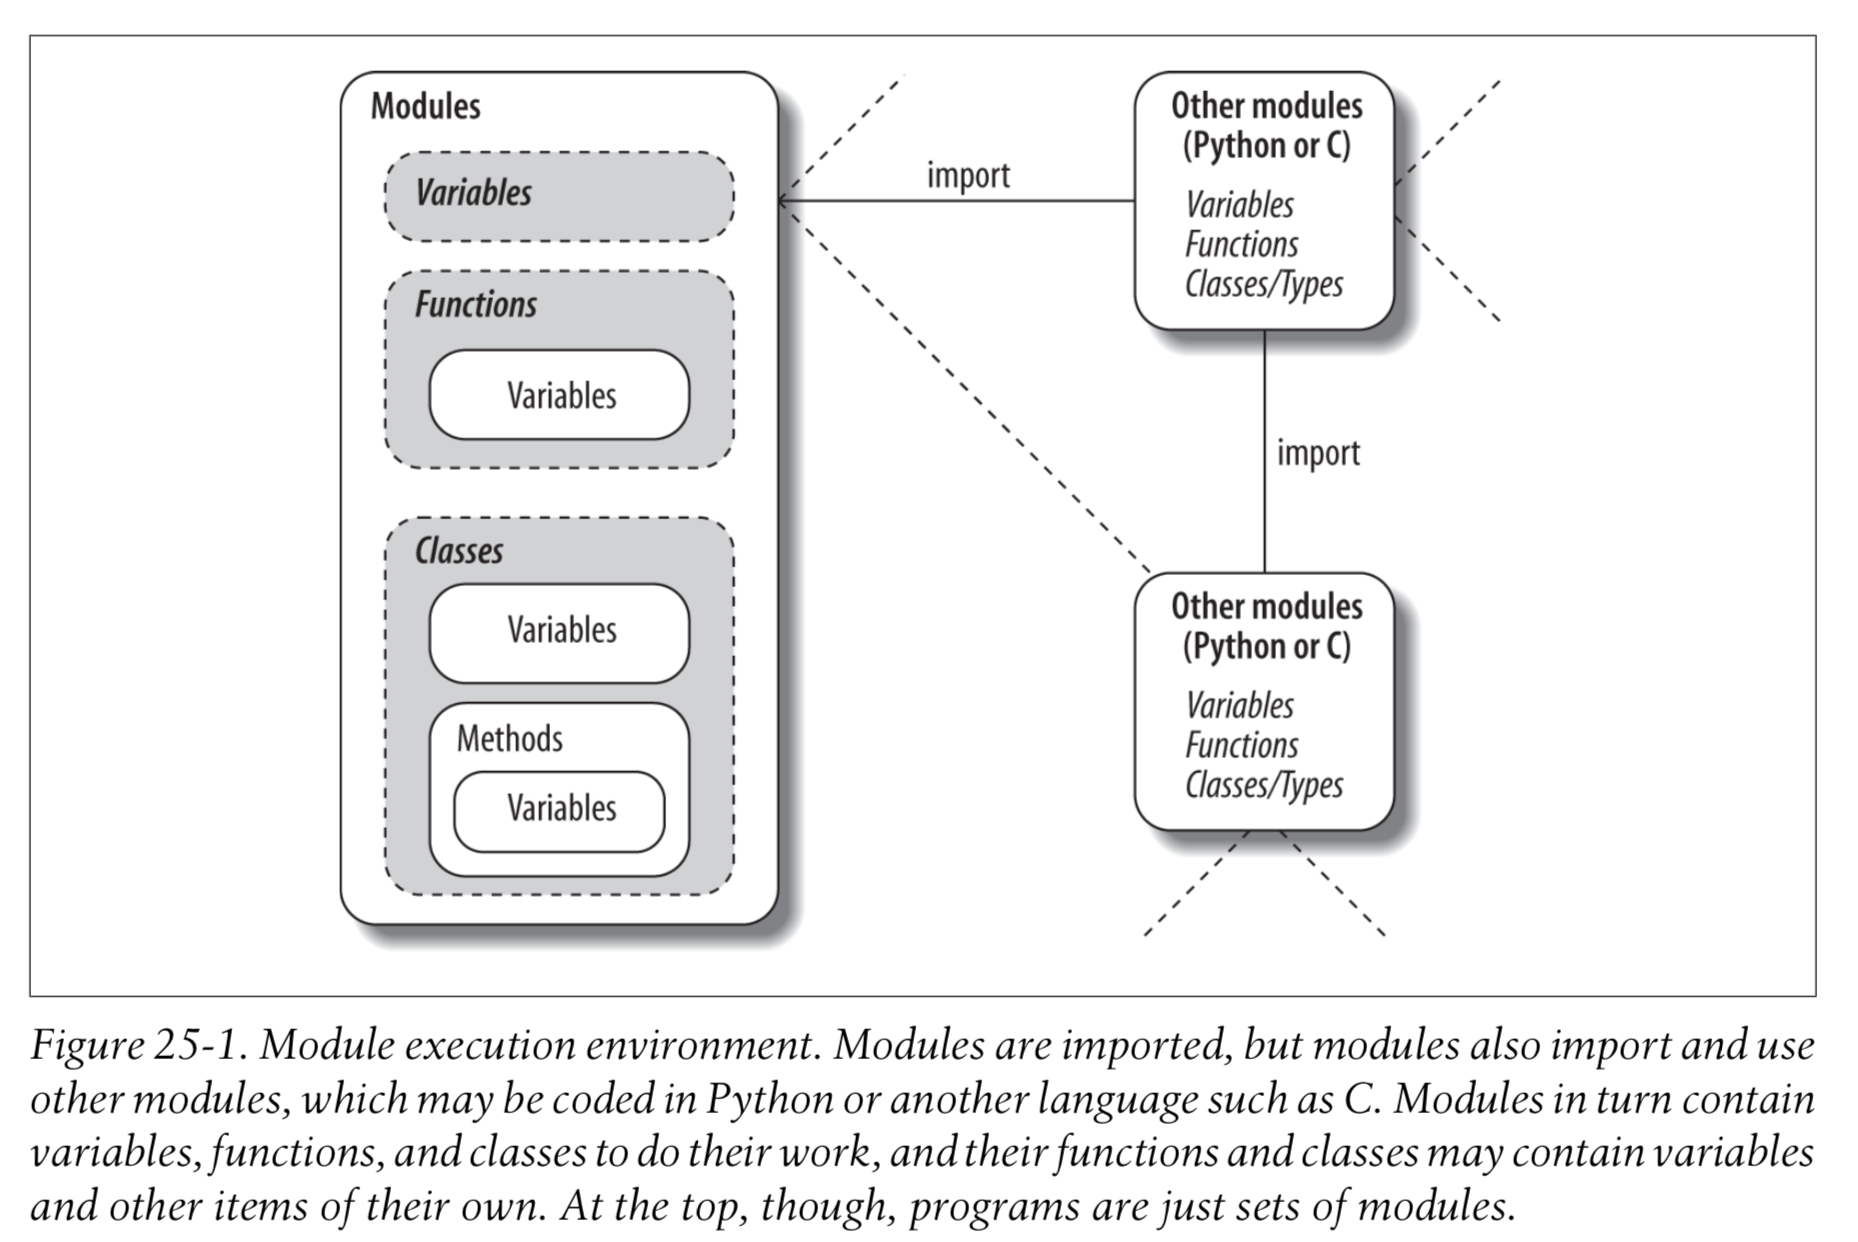

As a special case, you can prefix names with a single underscore (e.g., _X) to prevent them from being copied out when a client imports a module’s names with a ``from *``

In [ ]:
from unders import * # Load non _X names only

In [ ]:
a, c

In [ ]:
#it does not import _b why? it is hided by python due to __
#python protect variables with _
_b

In [ ]:
import unders # But other importers get every name

In [ ]:
unders._b

Alternatively, you can achieve a hiding effect similar to the ``_X`` naming convention by assigning a list of variable name strings to the variable ``__all__`` at the top level of the module.

In [ ]:
from alls import *  # Load __all__ names only

In [ ]:
#a,_c are in the list of __all__
a, _c

In [ ]:
#b is not in the list of __all__
b

In [ ]:
from alls import a, b, _c, _d   # But other importers get every name

In [ ]:
a, b, _c, _d

In [ ]:
import alls

In [ ]:
alls.a, alls.b, alls._c, alls._d

**Enabling Future Language Features: __future__**

In [ ]:
from __future__ import division

**Mixed Usage Modes: ``__name__`` and ``__main__``**

Each module has a built-in attribute called ``__name__``, which Python creates and assigns automatically as follows:

* If the file is being run as a top-level program file, ``__name__`` is set to the string "``__main__``" when it starts.

* If the file is being imported instead, ``__name__`` is set to the module’s name as known by its clients.

In [ ]:
#when we import runme. __name__ is not equal __main__. it will equal name of the module "rumme"
import runme

In [ ]:
import sys

In [ ]:
sys.path

In [ ]:
cd C:\\Users\\kryan\\Documents\\EE 551\\My Lecture Notes

In [ ]:
run runme.py

**Docstrings: Module Documentation at Work**

In [ ]:
import permute

In [ ]:
help(permute)

In [ ]:
reload(runme)

In [ ]:
help(runme)

**Changing the Module Search Path**

In [ ]:
import sys

In [ ]:
sys.path

In [ ]:
sys.path.append('/Users/sergulaydore/sourcedir') # Extend module search path

In [ ]:
sys.path